# Predicting Heart Disease Using Machine Learning
In this document, I will explore different Python-based machine learning libraries with the goal of constructing a machine learning model that can predict the presence of heart disease based on individuals' medical characteristics.

**The topics I will address include:**
1. Problem Definition
2. Data Source
3. Evaluation Criteria
4. Feature Selection
5. Model Building
6. Experimental Analysis

## 1. Problem Definition
> Given clinical parameters about a patient, can I predict if a patient has heart disease or not using machine learning models

## 2. Data Source
The data is sourced from: https://archive.ics.uci.edu/static/public/45/heart+disease.zip


## 3. Evaluation
If we can reaceh 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, I'll pursue the project

## 4. Features
Column descriptions:

**1. age:** displays the age of the individual.

**2. sex:** displays the gender of the individual using the following format :

• 1 = male

• 0 = female

**3. cp (Chest-Pain Type):** displays the type of chest-pain experienced by the individual using the following format :

• 0 = typical angina

• 1 = atypical angina

• 2= non — anginal pain

• 3 = asymptotic

**4. trestbps**(Resting Blood Pressure): displays the resting blood pressure value of an individual in mmHg (unit)

**5. chol**(Serum Cholestrol): displays the serum cholesterol in mg/dl (unit)

**6. fbs (Fasting Blood Sugar): compares an individual's fasting blood sugar value with 120mg/dl.

• If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)

**7. restecg (Resting ECG):** displays resting electrocardiographic results • 0 = normal

• 1 = having ST-T wave abnormality

• 2 = left ventricular hyperthrophy

**8. thalach(Max Heart Rate Achieved):** displays the max heart rate achieved by an individual.

**9. exang (Exercise induced angina):**

• 1 = yes

• 0 = no
**
**10.oldpeak (ST depression induced by exercise relative to rest):** displays the value of an integer or float.

**11.slope (Peak exercise ST segment) :**

• 0 = upsloping

• 1 = flat

• 2 = downsloping

**12.ca (Number of major vessels (0–3) colored by fluoroscopy):** displays the value as integer or float.

**13.thal:** displays the thalassemia (is an inherited blood disorder that causes your body to have less hemoglobin than normal) :

• 0 = normal

• 1 = fixed defect

• 2 = reversible defect

**14.target (Diagnosis of heart disease):** Displays whether the individual is suffering from heart disease or not :

• 0 = absence

• 1 = present

In [3]:
# Installing xgboost
!pip install xgboost

In [4]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Models from ScikitLearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from scikitplot.metrics import plot_roc

# using lightgbm
import lightgbm as lgb

In [6]:
# Load data
url = 'https://raw.githubusercontent.com/joe-seth/Machine-Learning-with-Scikit-Learn/main/datasets/heart-disease.csv'
df = pd.read_csv(url)

In [7]:
df.shape

(303, 14)

Inference: We have a dataset with 303 rows which indicates a smaller set of data.

## Exploratory Data Analysis
Find more about the data and become a subject matter expert with the data 
1. What is the problem at hand?
2. What kind of data is available and how do I treat it?
3. What's missing from the data and how do I deal with it?
4. Where are the outliers and why should you care about them?
5. How to change, add or remove features from the data?

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Numerical values for all columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

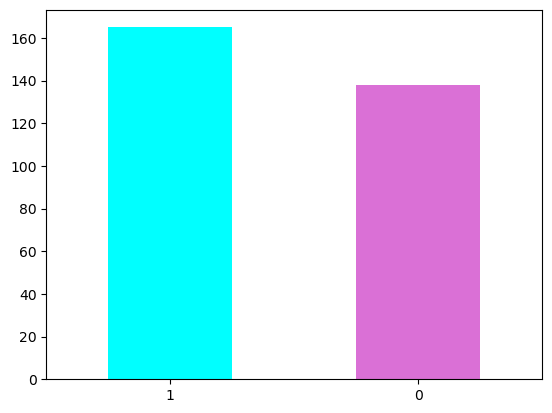

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
ax = df.target.value_counts().plot(kind='bar', color=['aqua', 'orchid'])

# Set the x-axis labels to be upright (rotation = 0 degrees)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

In [12]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Out of 14 features, we have 13 int types and only one with the float data types.

In [13]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Luckily the dataset doesn't have missing values

In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [15]:
# Compare the target columns with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


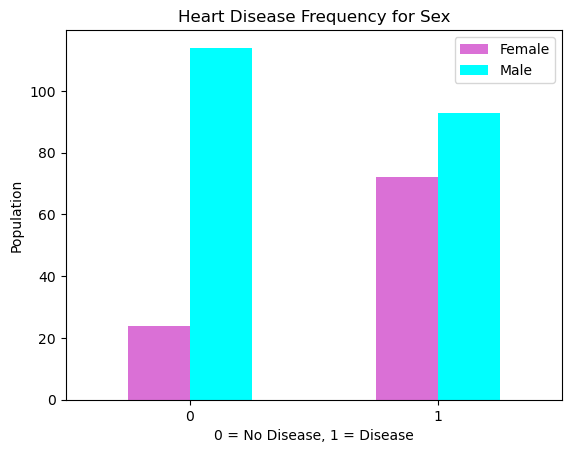

In [16]:
# Visualize the crosstab comparison
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['orchid', 'aqua']);
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Population')
plt.xticks(rotation=0)
plt.legend(['Female', 'Male']);

### Age vs Max heart rate(thalach)

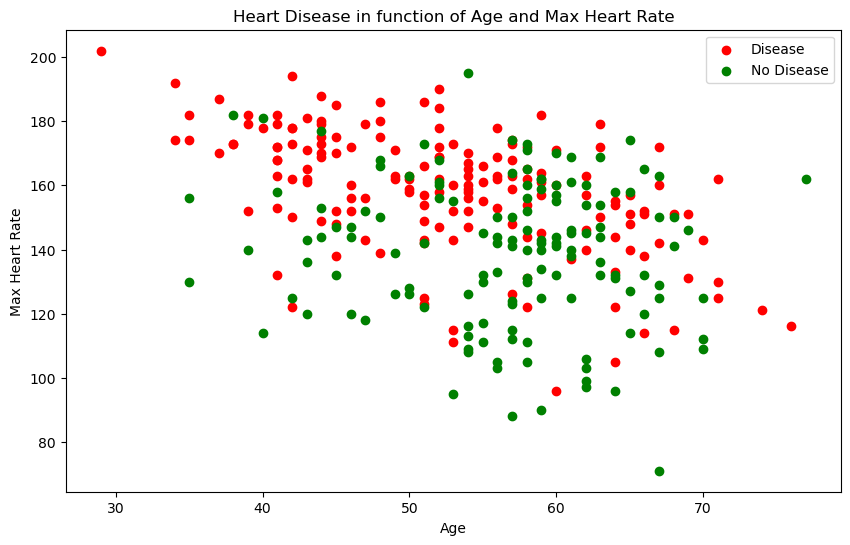

In [17]:
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c=['red']);

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c=['green'])

# Add some helpful information
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])
plt.show();

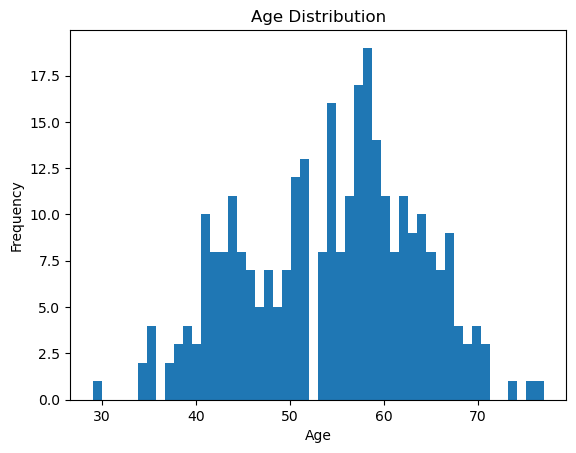

In [18]:
# Check the distribution of the age column with the Histogram
df.age.plot.hist(bins=50)
plt.xlabel("Age")
plt.title("Age Distribution")
plt.show();

In [19]:
### Heart Disease Frequency per Chest Pain
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


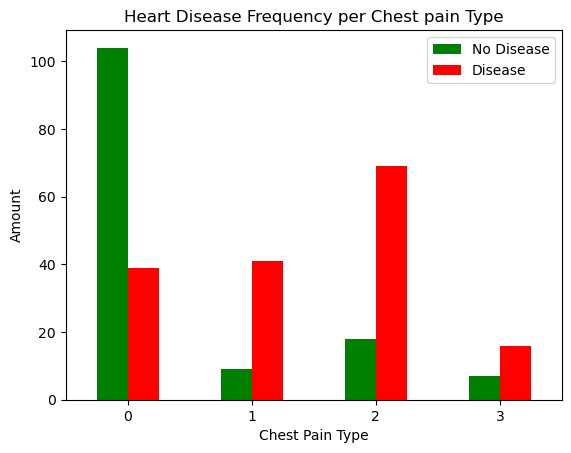

In [20]:
# Visualize the crosstab
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  color=['green', 'red'])
plt.title("Heart Disease Frequency per Chest pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.xticks(rotation=0);
plt.legend(['No Disease', 'Disease'])
plt.show();

In [21]:
# Find the correlation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


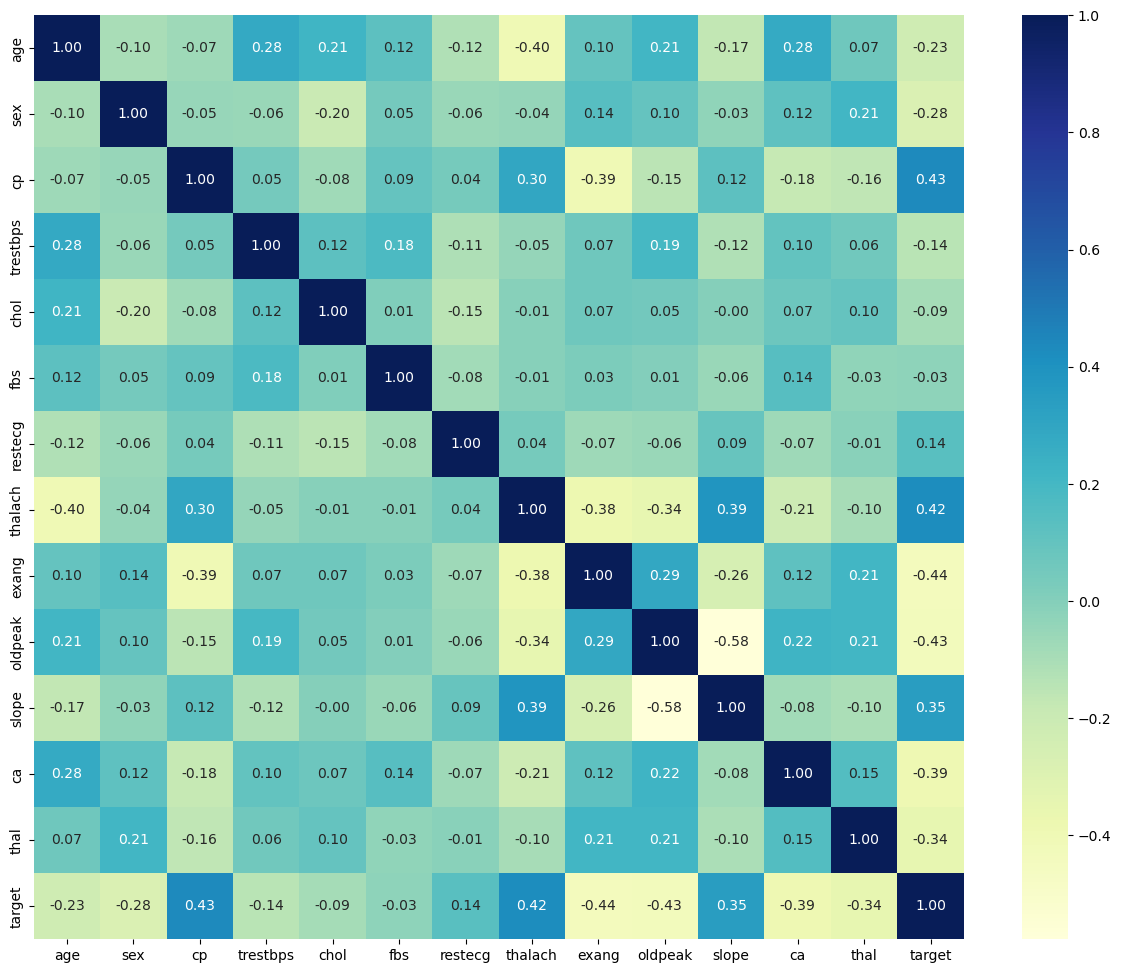

In [22]:
# Use seaborn to style
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(15,12))

# Create the heatmap with adjusted annotations and formatting
dataplot = sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

# Show the plot
plt.show()

It is always better to check the correlation between the features so that we can analyze that which feature is negatively correlated and which is positively correlated

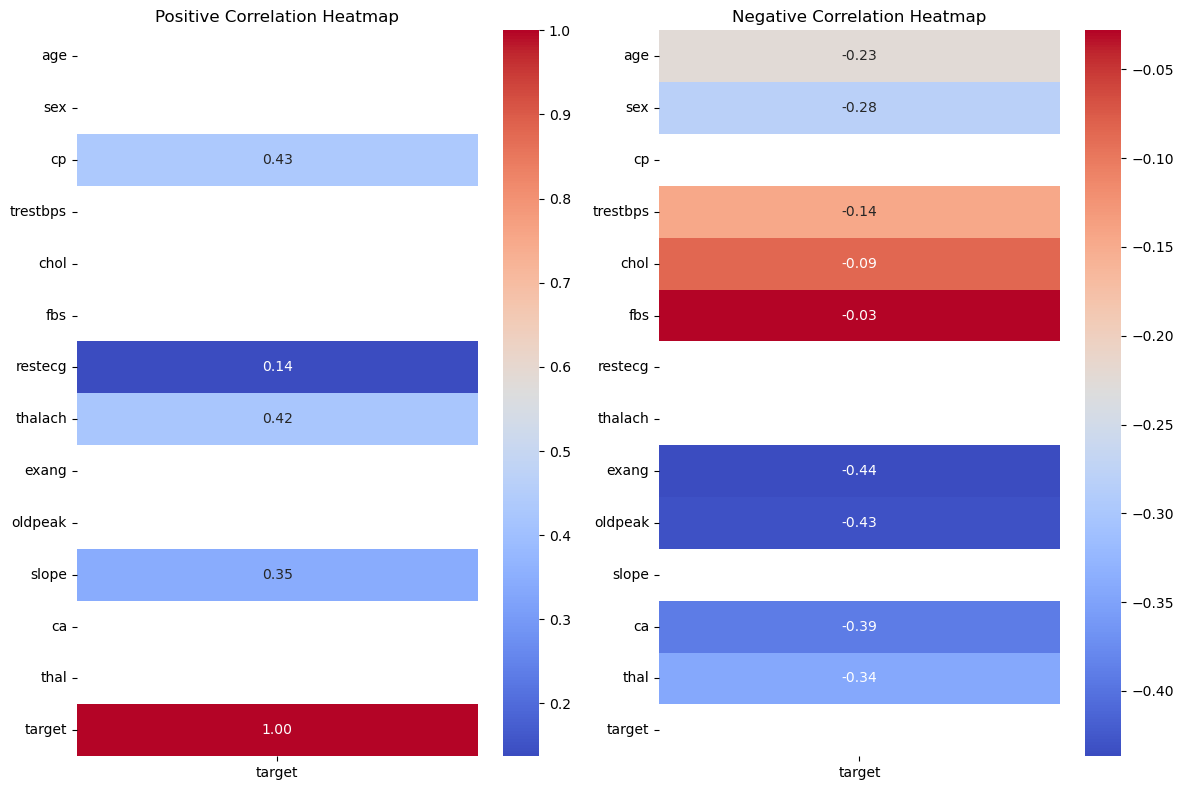

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame, and 'target' is the target variable
# Replace 'df' and 'target' with your actual variable names

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap for positive correlations
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)  # Create a subplot for positive correlations
sns.heatmap(corr_matrix[['target']].where(corr_matrix['target'] > 0), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Positive Correlation Heatmap')

# Create a heatmap for negative correlations
plt.subplot(1, 2, 2)  # Create a subplot for negative correlations
sns.heatmap(corr_matrix[['target']].where(corr_matrix['target'] < 0), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Negative Correlation Heatmap')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Inference: Insights from the above graph are:

    Four feature( “cp”, “restecg”, “thalach”, “slope” ) are positively correlated with the target feature.
    Other features are negatively correlated with the target feature.


# Univariate & Bivariate Analysis

## Age Analysis

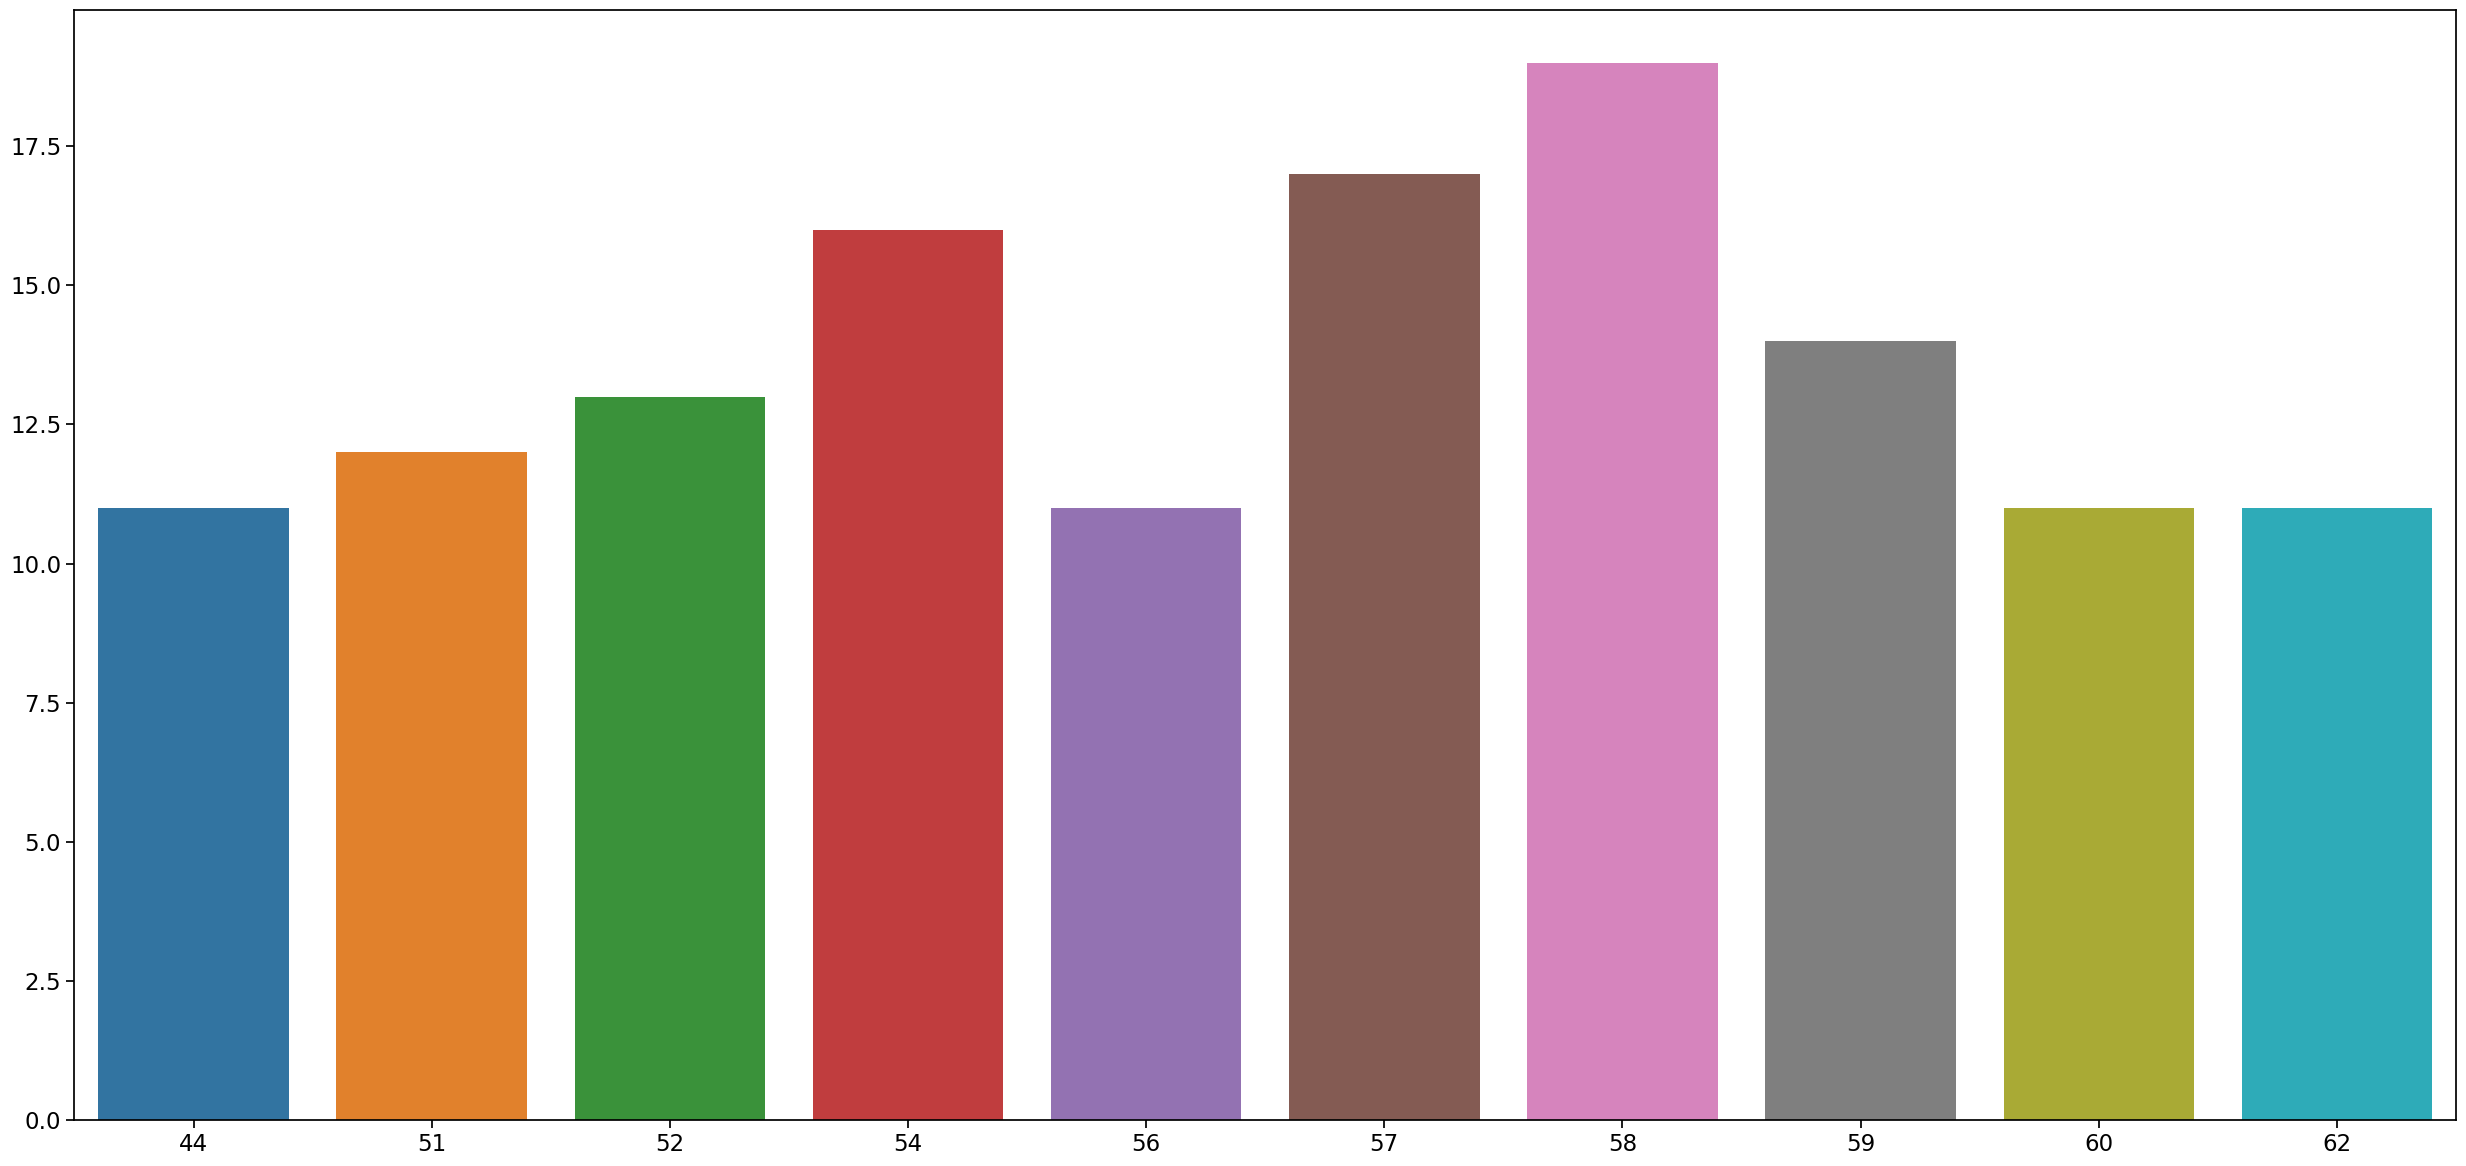

In [24]:
# A sample of the age
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.tight_layout()

Age **58** has the highest freqeuncy

In [25]:
# Check the range in the dataset
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


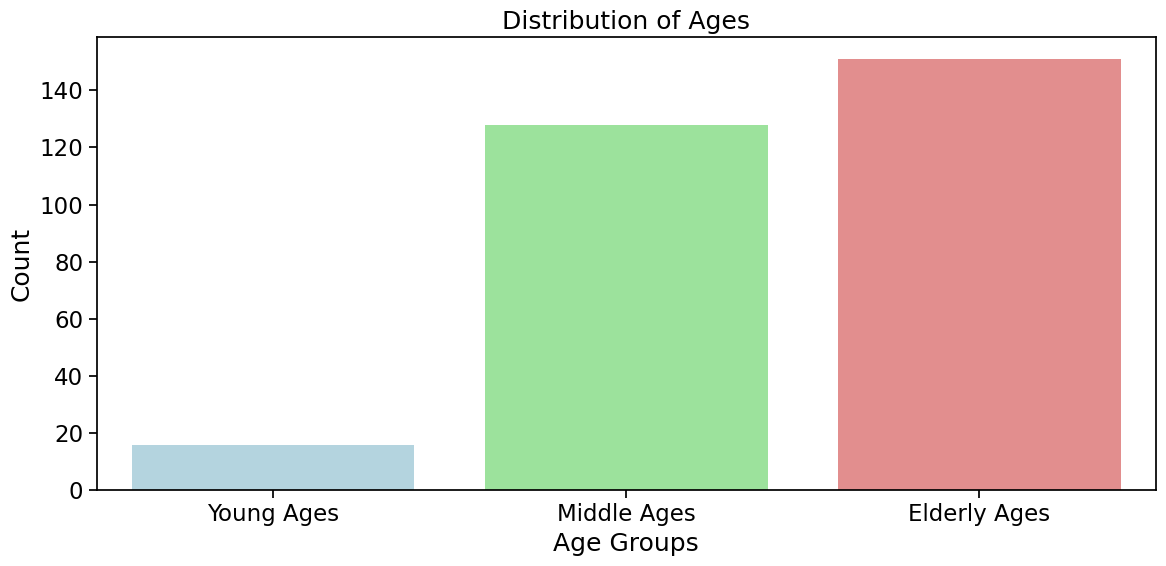

In [104]:
# Split the age into Yound Middle and Elder
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]

# Define custom colors for the bars
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create the bar plot with custom colors
plt.figure(figsize=(12, 6))
sns.set_context('notebook', font_scale=1.5)
sns.barplot(x=['Young Ages', 'Middle Ages', 'Elderly Ages'], y=[len(Young), len(Middle), len(Elder)], palette=colors)

# Add labels and title
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Distribution of Ages')

plt.tight_layout()
plt.show()


The elder people are the most affected by heart disease and young ones are the least affected.

This demographic can also be shown via a pie plot

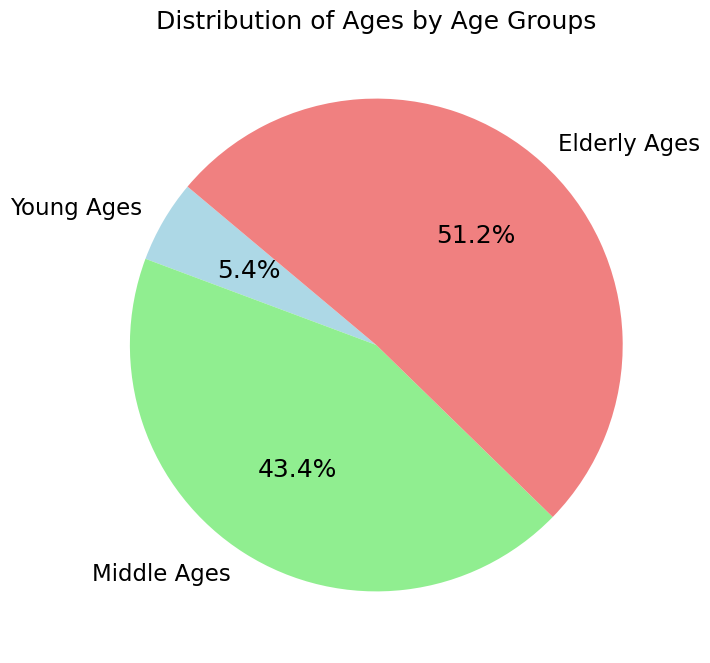

In [105]:
# Using a pie plot

# Count the number of individuals in each age group
age_group_counts = [len(Young), len(Middle), len(Elder)]

# Labels for the age groups
age_groups = ['Young Ages', 'Middle Ages', 'Elderly Ages']

# Define custom colors for the pie chart
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_groups, autopct='%1.1f%%', colors=colors, startangle=140)

# Add a title
plt.title('Distribution of Ages by Age Groups')

plt.show()


## Sex Analysis

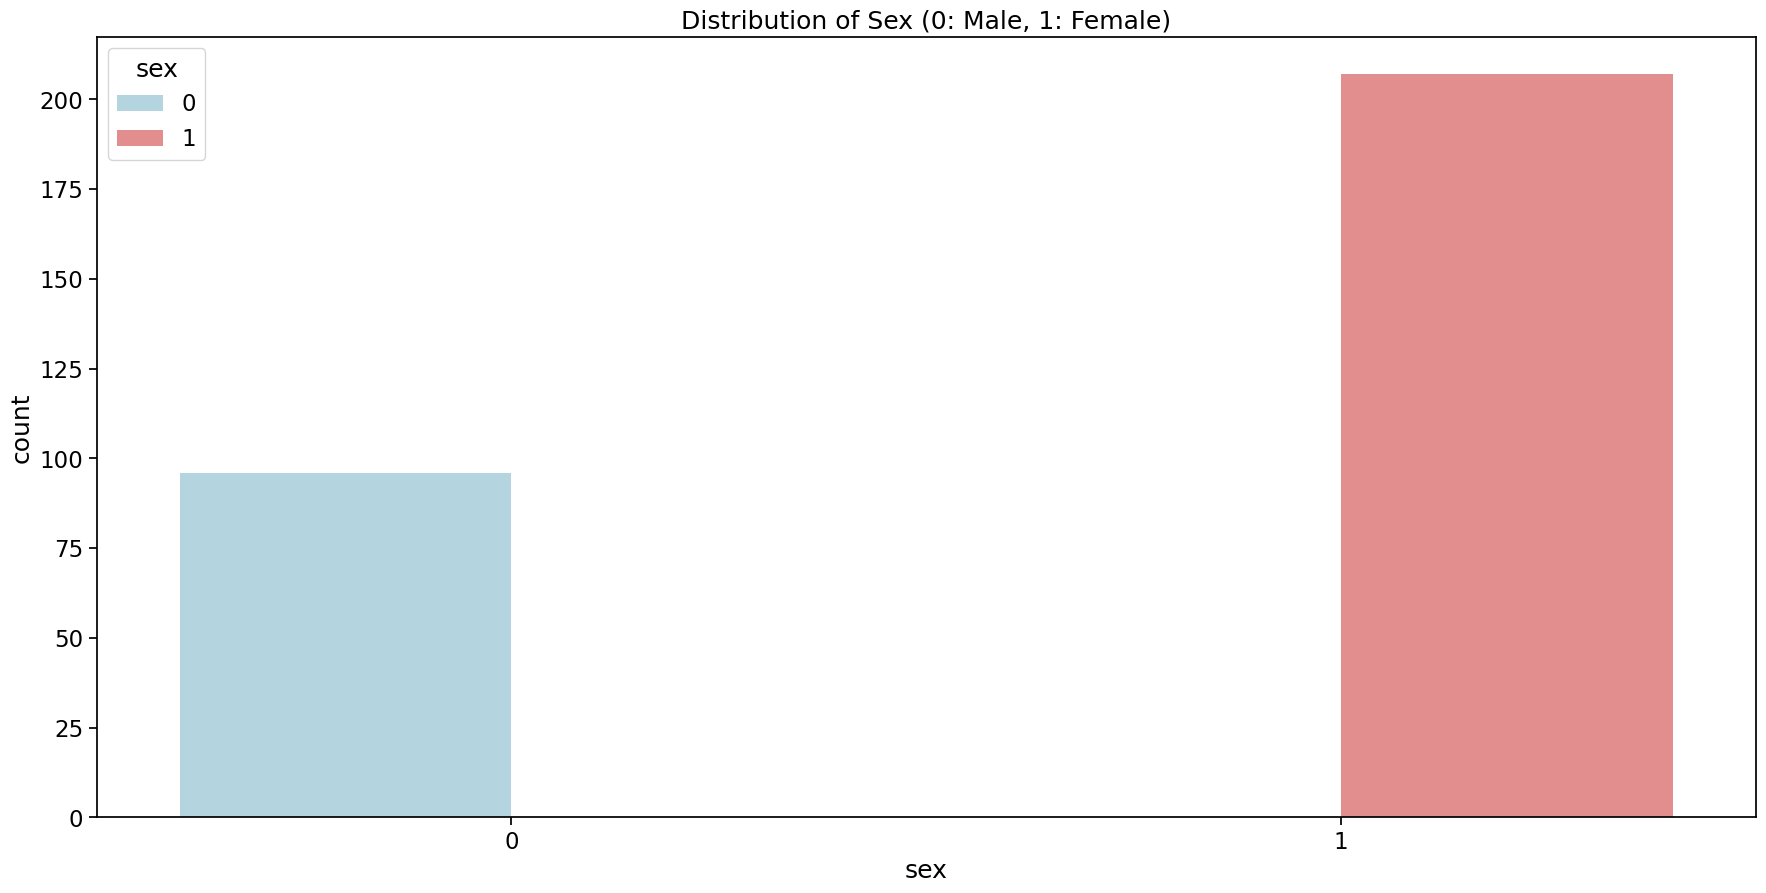

In [28]:

plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(data=df, x='sex', hue='sex', palette={0: 'lightblue', 1: 'lightcoral'})
plt.tight_layout()
plt.title('Distribution of Sex (0: Male, 1: Female)')
plt.show()


It is clearly visible that the  **ratio of Male to Female is 2:1**

#### Whats the relationship between slope and sex?

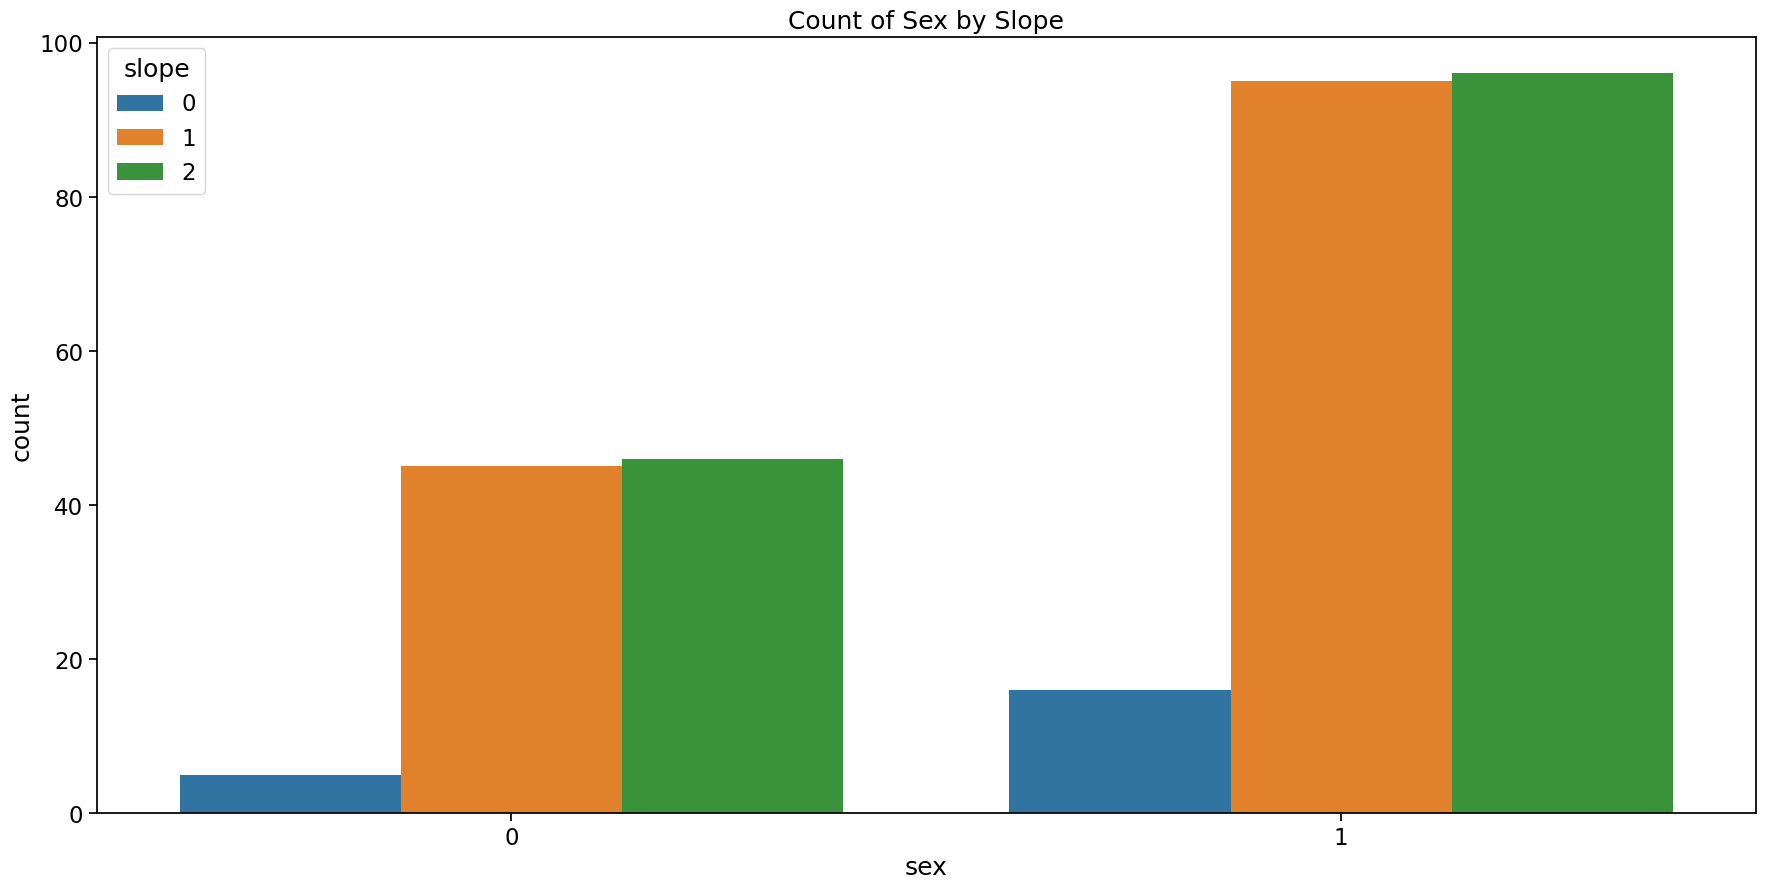

In [29]:
plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(data=df, x='sex', hue='slope')
plt.tight_layout()
plt.title('Count of Sex by Slope')
plt.show()


Inference: Here it is clearly visible that the slope value is higher in the case of males(1).

## Chest Pain Analysis

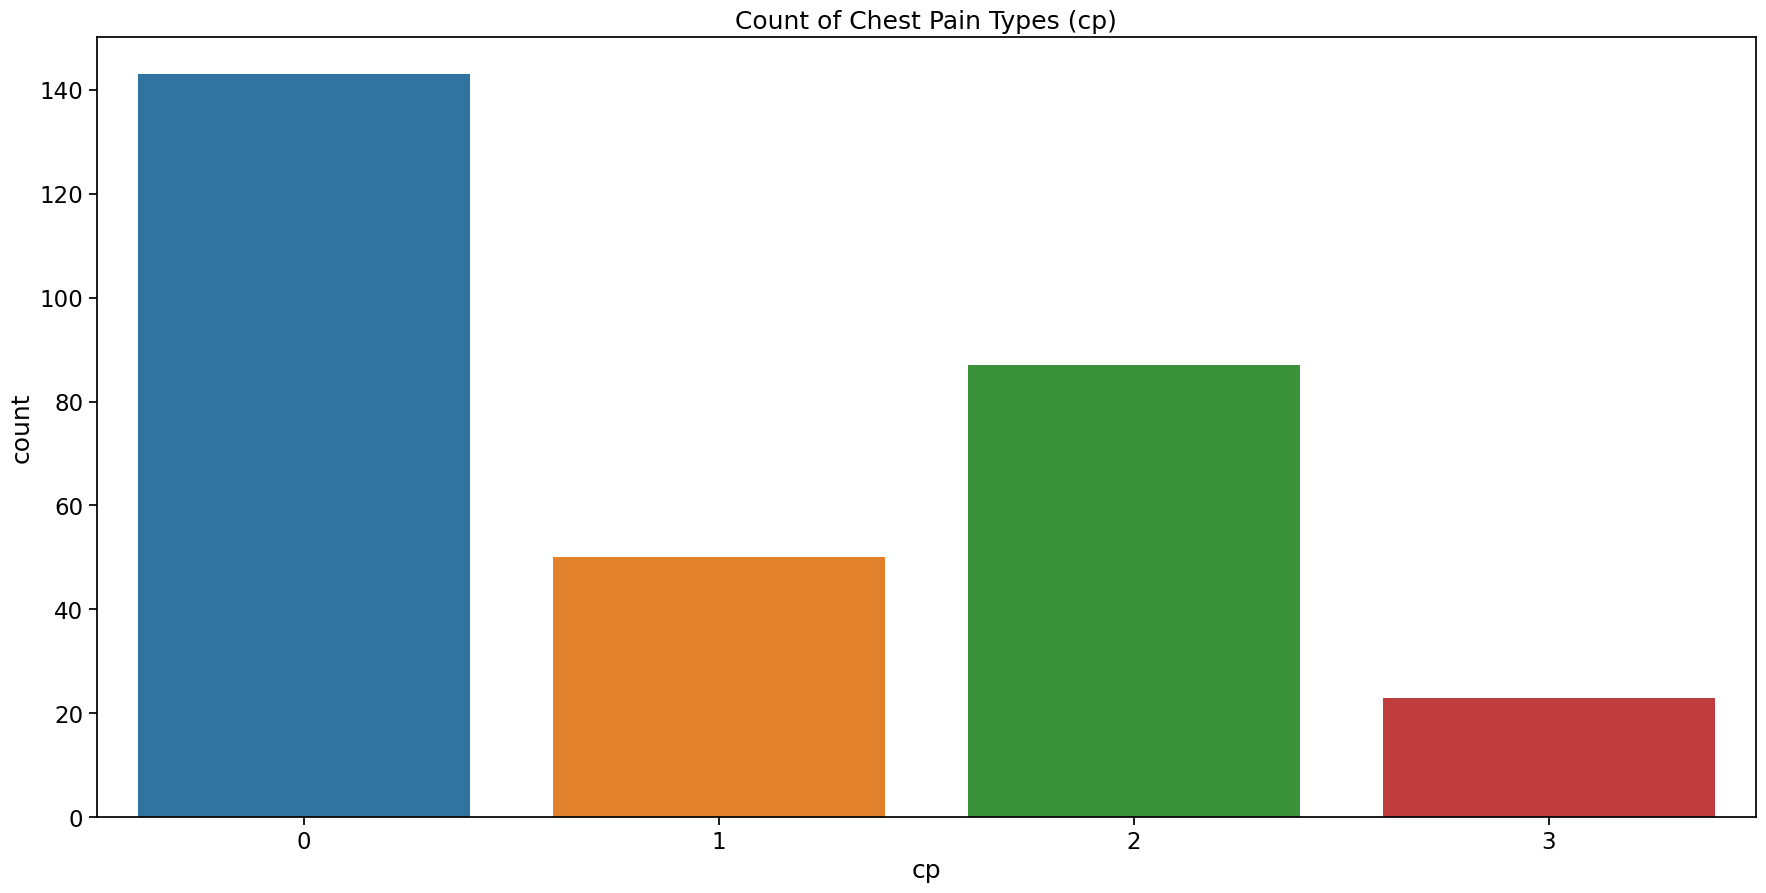

In [30]:
plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(data=df, x='cp')
plt.tight_layout()
plt.title('Count of Chest Pain Types (cp)')
plt.show()


Inference: As seen, there are 4 types of chest pain

    1. status at least
    2. condition slightly distressed
    3. condition medium problem
    4. condition too bad


### Analyzing cp vs target column

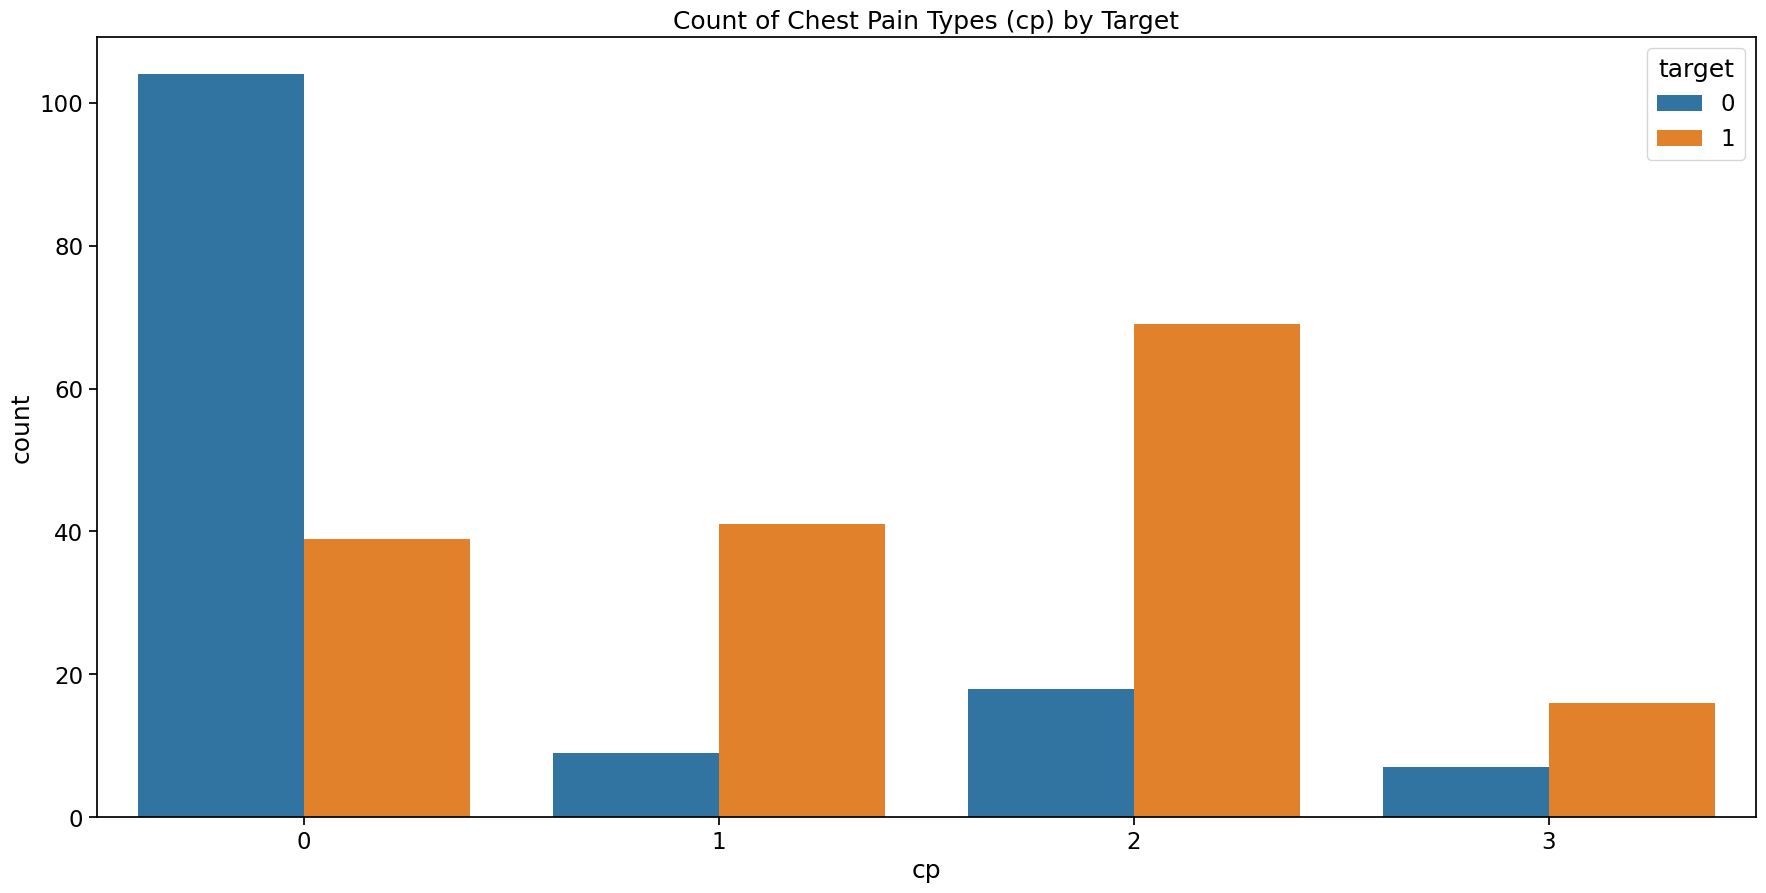

In [31]:
plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(data=df, x='cp', hue='target')
plt.tight_layout()
plt.title('Count of Chest Pain Types (cp) by Target')
plt.show()

Inference: From the above graph we can make some inferences,

    People having the least chest pain are not likely to have heart disease.
    People having severe chest pain are likely to have heart disease.

Elderly people are more likely to have chest pain.

## Thal Analysis

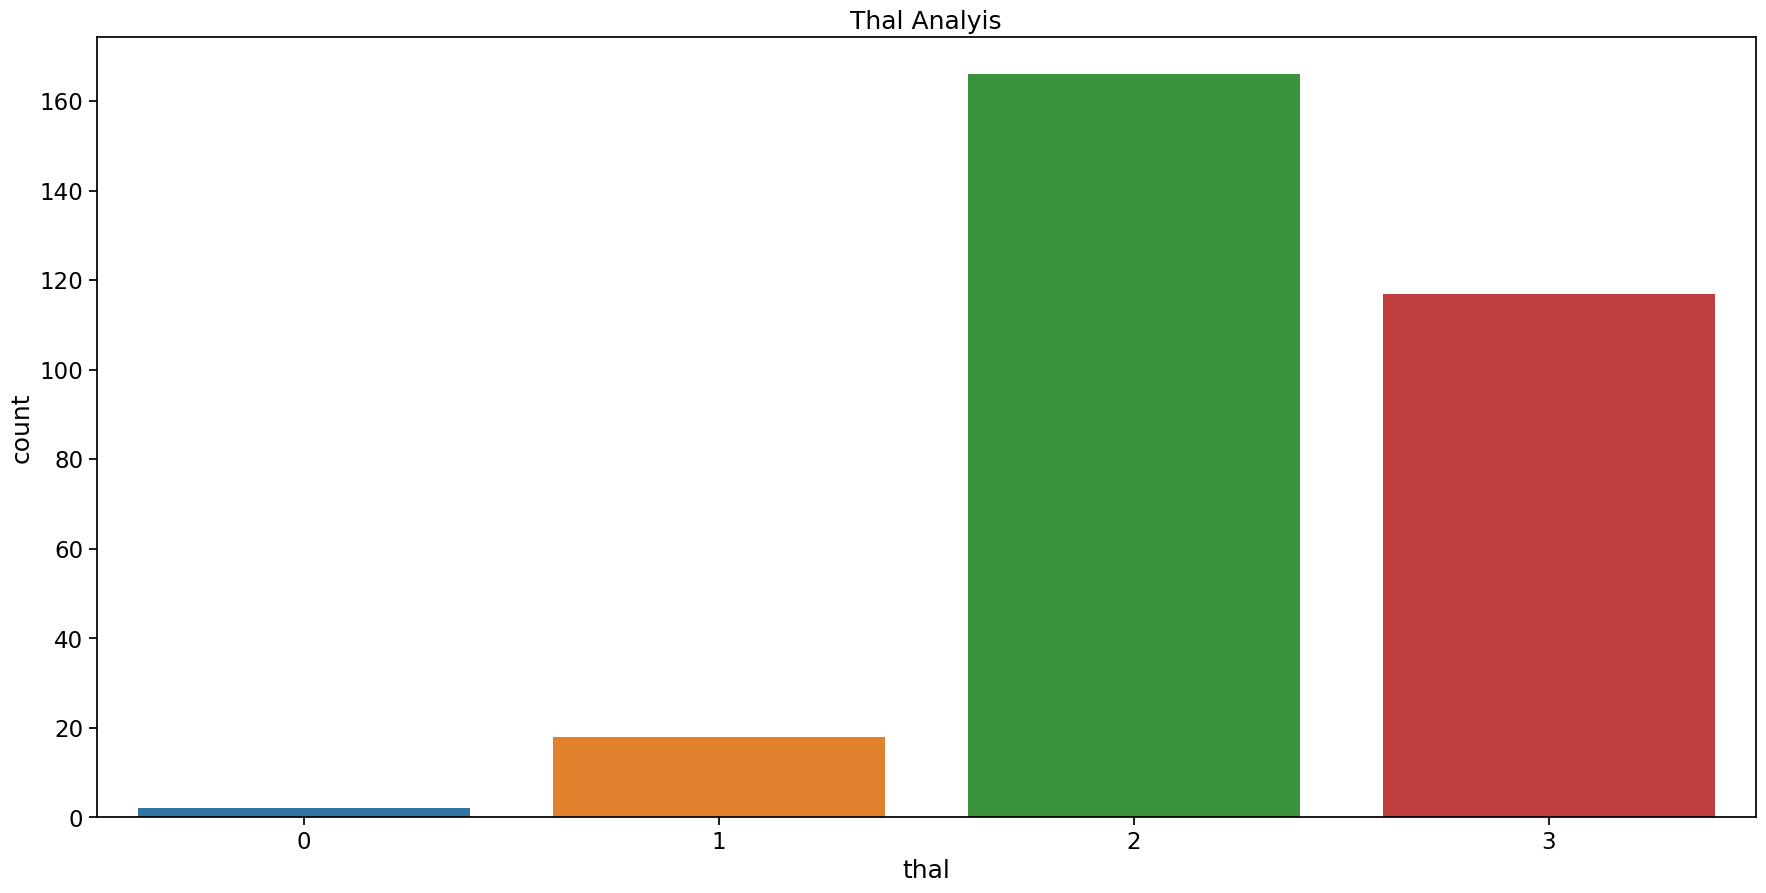

In [32]:
plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(data=df, x='thal')
plt.tight_layout()
plt.title('Thal Analyis')
plt.show()

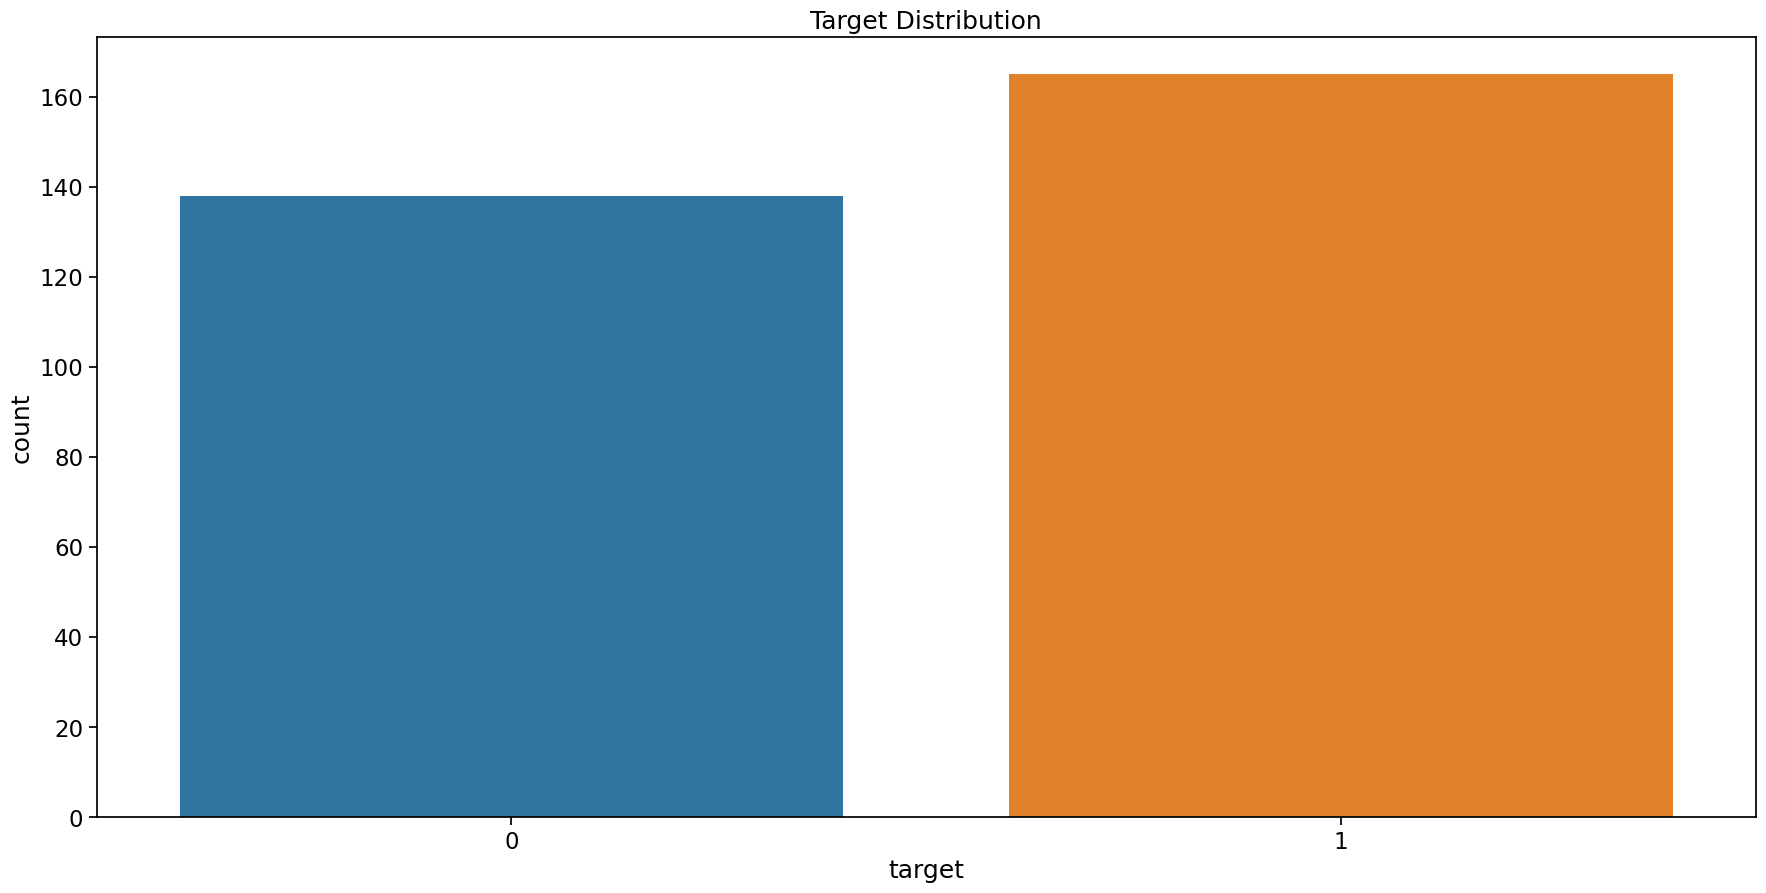

In [33]:
plt.figure(figsize=(18, 9))
sns.set_context('notebook', font_scale=1.5)
sns.countplot(data=df, x='target')
plt.tight_layout()
plt.title('Target Distribution')
plt.show()

In [91]:
neg = (df['target']==0).sum()/len(df)
pos = (df['target']==1).sum()/len(df)

print(f' The percentage of positive targets is {pos*100:.2f} %')
print(f' The percentage of Negative targets is {neg*100:.2f} %')

 The percentage of positive targets is 54.46 %
 The percentage of Negative targets is 45.54 %


In [34]:
count_of_ones = (df['target'] == 1).sum()
count_of_zeros = (df['target'] == 0).sum()

ratio = count_of_ones / count_of_zeros
ratio

1.1956521739130435

Inference: The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.

## Feature Engineering

The complete description of the continuous data as well as the categorical data

In [35]:
categorical_val = []
continous_val = []
for column in df.columns:
    print("--------------------")
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

In [36]:
categorical_val.remove('target')
dfs = pd.get_dummies(df, columns = categorical_val)
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


### Scaling

Using the standard scaler method to scale down the data so that it won’t raise the outliers also dataset which is scaled to general units leads to having better accuracy.

In [37]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


# Modelling
In this section I will use two datasets, one that has been standardized(dfs) and one the other one that has not been standardized(df)

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
dfs.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


### Method 1: Using data that has not been standardized

In [40]:
# Split the data into X and y
X = df.drop('target', axis=1)
y = df['target']

In [41]:
len(X), len(y)

(303, 303)

In [42]:
# Split the data into training and test sets
np.random.seed(42)

# Split into train & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Build the machine learning model:

    1. Logistic Regresssion
    2. K-Nearest Neighbors
    3. Random Forest Classifier
    4. Support Vector Machine
    5. Decision Tree Algorithms
    6. Naives Bayes Classifier
    7. XGBoost

In [43]:
# Put the models in a dictionary

models = {'Logistic Regression': LogisticRegression(),
         'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier(),
         'SVM': SVC(),
         'Decision Trees': DecisionTreeClassifier(),
         'Naive Bayes': GaussianNB(),
         'XGBoost': XGBClassifier()}

# Create a function to and score  models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    """
    
    np.random.seed(42)
    
    # Make a dictionay to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [44]:
model_scores = fit_and_score(models=models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

/home/joe/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'SVM': 0.7049180327868853,
 'Decision Trees': 0.8360655737704918,
 'Naive Bayes': 0.8688524590163934,
 'XGBoost': 0.819672131147541}

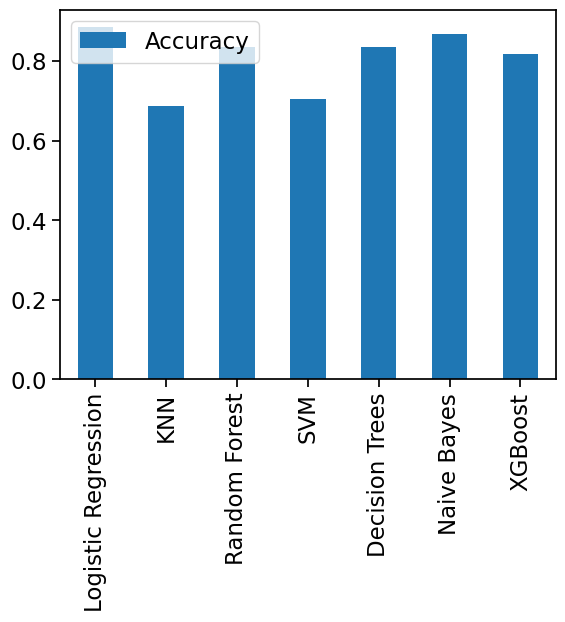

In [45]:
# Comparing the models
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar();

/tmp/ipykernel_30984/322112051.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{score:.2%}' for score in model_compare.loc['Accuracy']], fontsize=12)


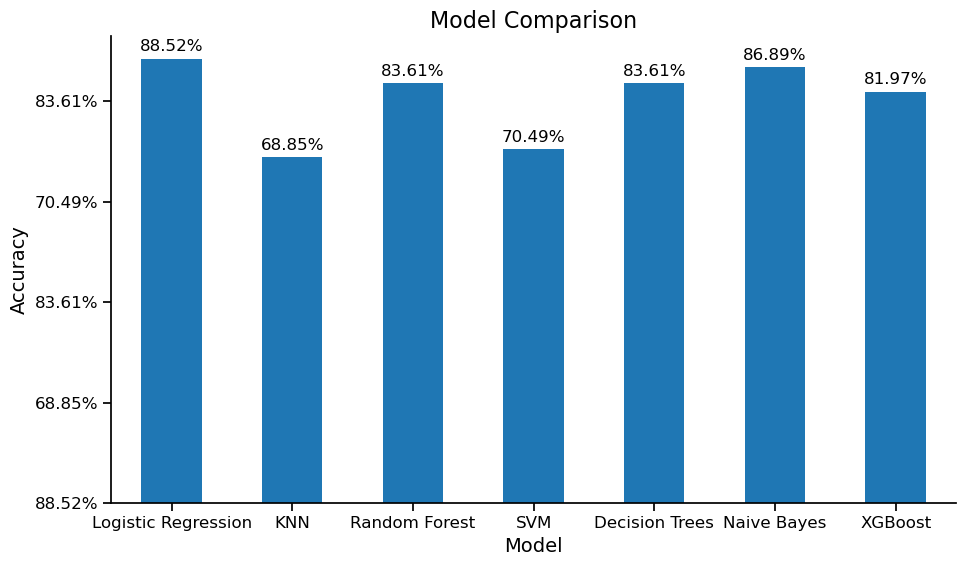

In [46]:
# Add more style to the Visualizations
import matplotlib.pyplot as plt

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data with custom styling
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Define custom colors
model_compare.T.plot(kind='bar', ax=ax, color=colors, legend=False)

# Customize the plot
ax.set_title('Model Comparison', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xticklabels(model_compare.columns, rotation=0, fontsize=12)
ax.set_yticklabels([f'{score:.2%}' for score in model_compare.loc['Accuracy']], fontsize=12)

# Add data labels above each bar
for bar in ax.containers[0]:
    height = bar.get_height()
    ax.annotate(f'{height:.2%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

# Remove unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

### What's Next?
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area Under the Curve(AUC)

## Hyperparameter Tuning

In [47]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Instantiate KNN
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [48]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [49]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


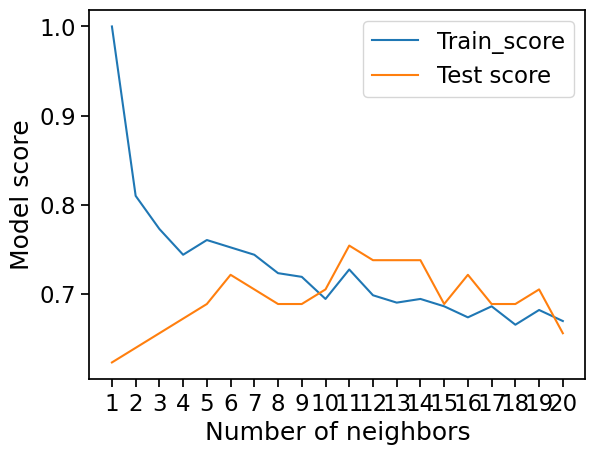

In [50]:
plt.plot(neighbors, train_scores, label='Train_score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xlabel('Number of neighbors')
plt.xticks(neighbors)
plt.ylabel('Model score')
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Tunning with RandomizedSeachCV
* LogisticRegression()
* RandomForestClassifier()


In [51]:
# Create hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               'solver': ['liblinear']}

# Create a hyperparameter grid for RanfomForestClassifier
rf_grid = {'n_estimators': np.arange(10,100, 50),
          'max_depth': [None, 3,5,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

In [52]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter tuning search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [53]:
# Find the best params
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [54]:
# Evaluate
rs_log_reg.score(X_test, y_test)

0.8852459016393442

### Tune RandomForest

In [55]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit 
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [56]:
# Check the best params
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [57]:
# Evaluate the model
rs_rf.score(X_test, y_test)

0.819672131147541

From the abover hyperparameter tuning experiments, it is clear that the model's aren't improving. I'll stick to the default parameters since they perform way much better

## Hyperparameter Tuning using GridSearchCV
Since LogisticRegression has the best performance so far, I'll just tweak it

In [58]:
# Different hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4,30),
               'solver': ['liblinear']}

# Set random seed
np.random.seed(42)

# Set up the hyperparamters for Grid
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [59]:
# Find the best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
# Eaaluate
gs_log_reg.score(X_test, y_test)

0.8852459016393442

Subsequently LogisticRegression() performed really well in all experiments both default hyperparameters and in hyperparameter tuning with an 88.52% accuracy across all experiments

# Evaluate the machine learning classifiers beyond accuracy
* ROC and AUC score
* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-score

In [61]:
# Make prediction with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [62]:
# Import auc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_preds)

0.8841594827586207

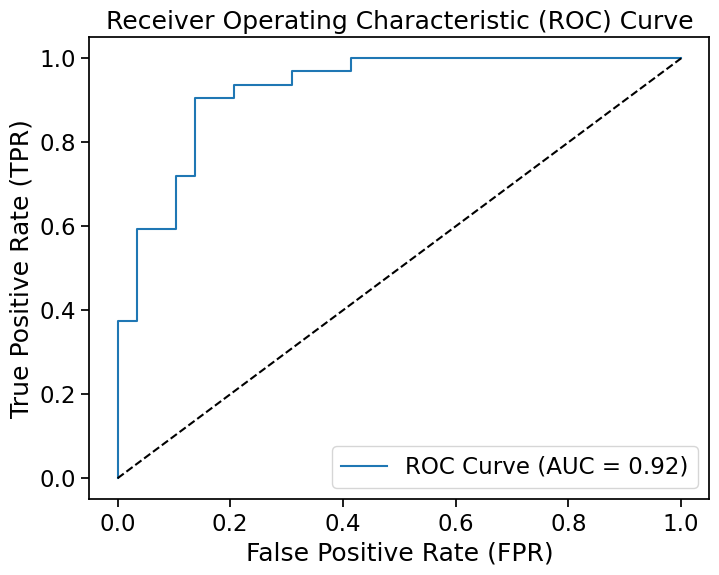

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have already fitted your model (gs_log_reg) and have X_test and y_test

# Get predicted probabilities
y_pred_prob = gs_log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Create a figure
plt.figure(figsize=(8, 6))

# Plot ROC curve with some padding
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line

# Set custom x and y limits with padding
plt.xlim([-0.05, 1.05])  # Adjust the x limits
plt.ylim([-0.05, 1.05])  # Adjust the y limits

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

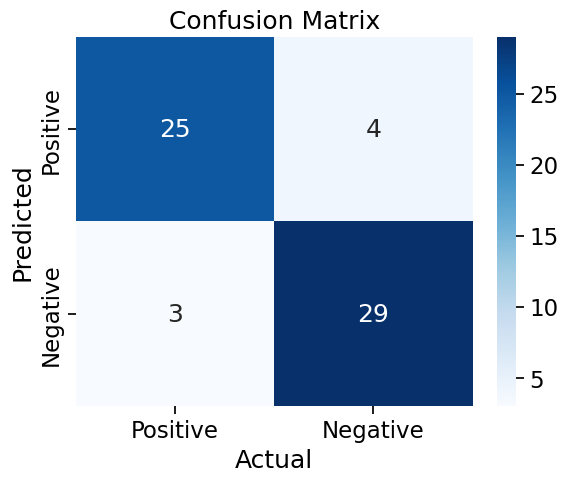

In [64]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)

# Create a heatmap with labels in the desired format
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [65]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Caluculate evaluation metric using CV
Calculate accuracy, precision, recall and f1-score using cross validation 

In [66]:
# Use gs_log_reg best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [67]:
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

In [96]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [97]:
clf.score(X_train, y_train)

0.8584905660377359

In [69]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X_test, y_test, cv=5,scoring='accuracy')
cv_accuracy = np.mean(cv_acc)

In [70]:
# Cross-validated precision
cv_prec = cross_val_score(clf, X_test, y_test, cv=5, scoring='precision')
cv_precision = np.mean((cv_prec))

In [71]:
# Cross-validated recall
cv_rec = cross_val_score(clf, X_test, y_test, cv=5, scoring='recall')
cv_recall=np.mean(cv_rec)

In [72]:
# Cross-validated f1
cv_f1 = cross_val_score(clf, X_test, y_test, cv=5, scoring='f1')
cv_f1_score = np.mean(cv_f1)

In [73]:
print(f'The accuracy is {cv_accuracy*100:.2f}%')
print(f'The precision is {cv_precision*100:.2f}%')
print(f'The recall is {cv_recall*100:.2f}%')
print(f'The f1_score is {cv_f1_score*100:.2f}%')

The accuracy is 83.72%
The precision is 85.48%
The recall is 84.76%
The f1_score is 84.52%


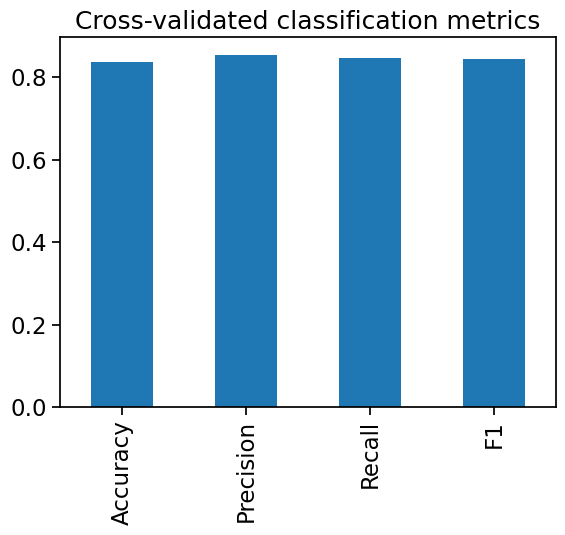

In [74]:
# Visualize the metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1_score},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics', legend=False);

### Feature importance

In [75]:
# check coef
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [76]:
# Match coef's features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

In [93]:
feature_df = pd.DataFrame(feature_dict, index=[0])

<Figure size 1000x600 with 0 Axes>

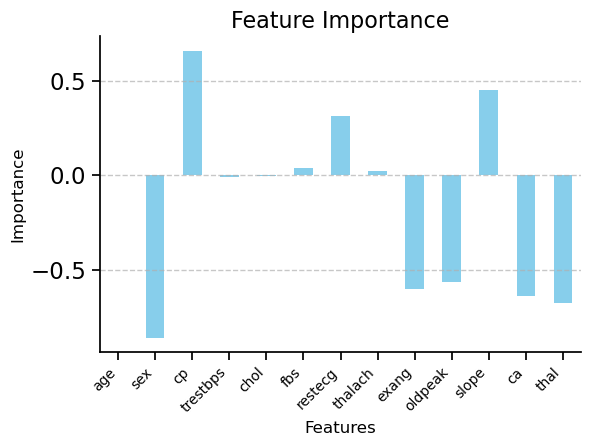

In [94]:
# Visualize feature importance
import matplotlib.pyplot as plt
import pandas as pd

# Style the plot
plt.figure(figsize=(10, 6))  # Set the figure size
ax = feature_df.T.plot(kind='bar', legend=False, color='skyblue')  # Bar plot with a light blue color

# Add title and labels
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)

# Customize the x-axis labels (rotation and font size)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10, ha='right')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show();


In [ ]:
pd.crosstab(df.sex, df.target)

In [ ]:
# Repeat the process using standardize data

# Method 2: Using Standardized data

In [78]:
## Splitting our Dataset

X = dfs.drop('target', axis=1)
y = dfs.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNeighborsClassifier with 10 neighbors
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


AttributeError: 'Flags' object has no attribute 'c_contiguous'

# Conclusion
I still can't fix the above error. I'll make changes in the future

I did data visualization and data analysis of the target variable, age features, and whatnot along with its univariate analysis and bivariate analysis.

Heart Disease is one of the major concerns for society today. It is difficult to manually determine the odds of getting heart disease based on risk factors. However, using Machine Learning, we will predict whether the person is suffering from heart disease or not in no time. Due to the fast and accurate classification of Heart Disease, doctors will provide proper treatment to the patients and save their life.

Happy Learning :)

From the above model accuracy, Logistic Regression is giving us the accuracy which is 88.5%